# CP322 Assignment 2 - Winter 2022
## Name: Christopher Rossi
## Date: 2022-02-11


### 1 Concept Questions

### 1.1 Write an expression for the joint likelihood of the network in it's factored form

P(a,b,c,d,e,f,g) = P(a) * P(b|a) * P(c|b) * P(g) * P(f|g) * P(d|c,f) * P(e|d)

### 1.2 What is P (K = 1|a = 1, b = 1, c = 0) & P (K = 0|a = 1, b = 1)?

P(K=1|a=1,b=1,c=0)

= P(K|a,b,!c)

= P(K,a,b,!c)/P(a,b,!c)

= (P(K)P(a|K)P(b|K)*P(!c|K))/(P(K,a,b,!c)+P(!K,a,b,!c))

= ((1/2)((1/2)(1/2) / (1/2))((3/8)(1/2)/(1/2))((3/8)(1/2) / (1/2) / (((1/2)(1/2)(3/8)(3/8)) + ((1/2)(1/2)(3/8)(3/8)))

= ((1/2)(1/2)(3/8)(3/8)) / (((1/2)(1/2)(3/8)(3/8)) + ((1/2)(1/2)(3/8) * (3/8)))

= 9/256 / 18/256

= 9/18

= 1/2

P(K=0|a=1,b=1)

= P(!K|a,b)

= P(!K,a,b)/P(a,b)

= (P(!K)P(a|!K)P(b|!K))/(P(!K,a,b)+P(K,a,b))

= ((1/2)((1/2)(1/2)/(1/2))((3/8)(1/2)/(1/2))/(((1/2)(1/2)(3/8))+((1/2)(1/2)(3/8)))

= ((1/2)(1/2)(3/8))/(((1/2)(1/2)(3/8))+((1/2)(1/2)(3/8)))

= 3/32 / 6/32

= 3/6

= 1/2

### 2.1 Data Loading and Preprocessing

In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import preprocessing
import seaborn as sns


# Otto Classification Challenge dataset hosted by Kaggle 2015
df = pd.read_csv("otto.csv", header=0)

# exact number of instances and number of classes;
row, col = df.shape
print(f"There are {row} instances")
print(f"There are {col} classes")

There are 61878 instances
There are 95 classes


### 2.1.2 Handle missing values, remove non-numeric class labels & filtering rows with all zero values

In [2]:
# Convert target values into numeric values
label = preprocessing.LabelEncoder()
df['target'] = label.fit_transform(df['target'])
# Removes rows with all zero values
df = df.loc[~(df==0).all(axis=1)]

In [3]:
# Include all columns except id and target
X = df.iloc[:,1:-1]
y = df['target']

# Split dataset into training set and test set, 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

### 2.2 Algorithm Implementation

In [4]:
'''
K-Nearest Neighbors Algorithm
'''
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=15)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_knn_pred = knn.predict(X_test)

'''
Random Forest Algorithm
'''
# Create a RFC Classifier
rfc=RandomForestClassifier()

# Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

# Predict the response for test dataset
y_rfc_pred = rfc.predict(X_test)

'''
Naive Baye's Algorithm
'''
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_gnb_pred = gnb.predict(X_test)

### 2.3 Performance Comparison

### 2.3.1 F1 Measure of KNN, RFC, and GNB Algorithms

In [5]:
print("KNN F1-Score: ", f1_score(y_test,y_knn_pred,average='micro'))
print("RFC F1-Score: ", f1_score(y_test,y_rfc_pred,average='micro'))
print("GNB F1-Score: ", f1_score(y_test,y_gnb_pred,average='micro'))


KNN F1-Score:  0.7706851971557854
RFC F1-Score:  0.8019553975436329
GNB F1-Score:  0.6081932773109243


### 2.3.2 Observation and analysis on the results

For the otto dataset, we have implemented the K-Nearest Neighbor (KNN), Random Forest (RFC), and Gaussian Naïve Bayes (GNB) Algorithms. From this, we computed a predicted and measured f1 score metric to assess the quality of the models, however, we do need to note that no specific value that is considered a “good” f1 score, which is why we generally pick the classification model that produces the highest f1 score. KNN produced a 0.7706 f1 score, RFC made a 0.8017, and GNB created a 0.6081; based on our results, I believe that the RFC classifier has the potential to be an ideal classifier, as it is has the highest f1 score, however, random forests are made up of decision trees which are not great on imbalanced datasets and major modifications must be made for it to be suitable for imbalanced classifications. An argument can be made for the KNN model as it is the second highest f1 score and noticeable higher than GNB classifier which can also be seen in the heatmap where KNN and RFC has a much stronger correlation than GNB. Thus, given by my optimization and results, the best classifier would be RFC based on the highest f1 score and strongest correlation on the heat map.

### 2.3.3 Visualization of pair-weise correlation

<AxesSubplot:>

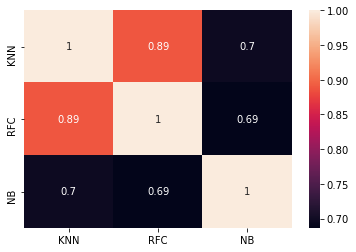

In [6]:
# Three dataframes for each model
KNN = pd.DataFrame(y_knn_pred,columns=["KNN"])
RFC = pd.DataFrame(y_rfc_pred,columns=["RFC"])
NB = pd.DataFrame(y_gnb_pred,columns=["NB"])

# Combine three dataframes into one
df2 = pd.concat([KNN, RFC, NB], axis=1, join="inner")

# Set column name for graph
Cols = ['KNN', 'RFC', 'NB']

# Create heat map 
sns.heatmap(df2.corr(),xticklabels=Cols,yticklabels=Cols,annot=True)
